## Import dependencies and modules

In [1]:
# Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import h5py
import xarray as xr
import glob as glob
import sys
import os

# Our modules
sys.path.append('/home/jovyan/segtrax/source')
import utilities as ut
import reader as rd
from trajectory import Trajectory

## Import data
Check if we already have the data, and if not then go out and download it from the AWS s3 bucket

#### ERA-I

In [2]:
if len(os.listdir('/home/jovyan/segtrax/data/era_i/')) <= 1:
    print("Downloading ERA-I data to `/home/jovyan/segtrax/data/era_i/` directory")
    
    !aws s3 cp s3://pangeo-data-upload-oregon/icesat2/segtrax/era-interim-t2m.2018-11.nc ../data/era_i/era-interim-t2m.2018-11.nc
    !aws s3 cp s3://pangeo-data-upload-oregon/icesat2/segtrax/era-interim-t2m.2018-12.nc ../data/era_i/era-interim-t2m.2018-12.nc
    !aws s3 cp s3://pangeo-data-upload-oregon/icesat2/segtrax/era-interim-t2m.2019-01.nc ../data/era_i/era-interim-t2m.2019-01.nc
    !aws s3 cp s3://pangeo-data-upload-oregon/icesat2/segtrax/era-interim-t2m.2019-02.nc ../data/era_i/era-interim-t2m.2019-02.nc
    
else:
    print("Already have ERA-I data")

Already have ERA-I data


#### ATL10

In [3]:
if len(os.listdir('/home/jovyan/segtrax/data/atl10/')) <= 2:
    print("Downloading ATL10 data to `/home/jovyan/segtrax/data/atl10/` directory")

    !aws s3 cp s3://pangeo-data-upload-oregon/icesat2/segtrax/Outputs.tar.gz /home/jovyan/segtrax/data/atl10/
    !tar -xzvf /home/jovyan/segtrax/data/atl10/Outputs.tar.gz -C /home/jovyan/segtrax/data/atl10/ --strip-components=1

else:
    print("Already have ATL10 data")

Already have ATL10 data


#### Ice Motion
- Included in `data/` directory in repo

### Inspect the data

In [19]:
# Load data for one file
f = '/home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181105000518_05710101_001_01.h5'
df = rd.getATL10(f, beam='gt1l')
df.head(5)

ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181105000518_05710101_001_01.h5


,segment_id,segment_length,freeboard,lon,lat,date,delta_time,year,month,day
0,167735,9.670000e+06,0.289270,179.531275,86.162729,2018-01-01,0.000000,2018,1,1
1,167736,9.670006e+06,0.302681,179.530892,86.162769,2018-01-01,0.000755,2018,1,1
2,167737,9.670011e+06,0.321814,179.530493,86.162812,2018-01-01,0.001543,2018,1,1
3,167738,9.670015e+06,0.309469,179.530209,86.162842,2018-01-01,0.002105,2018,1,1
4,167739,9.670022e+06,0.293484,179.529760,86.162890,2018-01-01,0.002991,2018,1,1


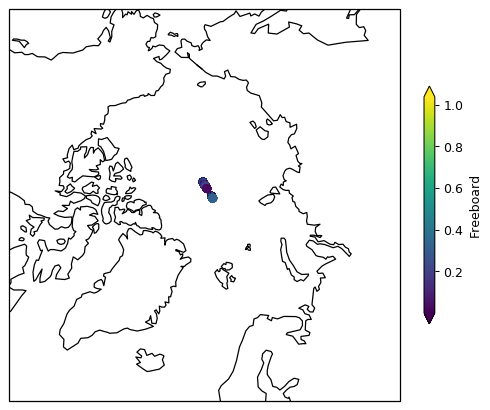

In [20]:
# Plot freeboard height over map
plt.figure(figsize=(7,7), dpi= 90)
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=70))
plt.scatter(df['lon'], df['lat'], c=df['freeboard'], cmap='viridis', transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(label='Freeboard', shrink=0.5, extend='both')

# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

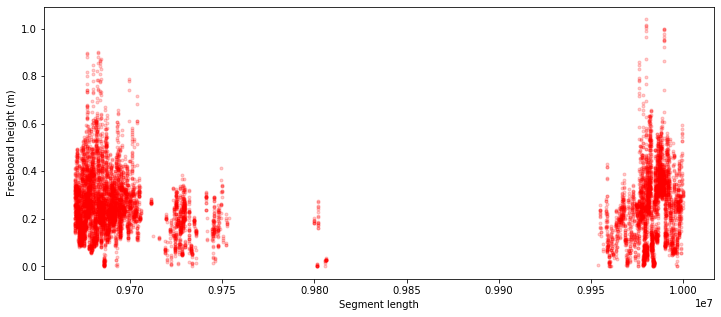

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(df['segment_length'], df['freeboard'], color='r', marker='.', linestyle='None', alpha=0.2)
plt.xlabel('Segment length')
plt.ylabel('Freeboard height (m)')
plt.show()

## Initialize list of objects
1. Get list of data files with glob library
2. Iterate through each file and create a trajectory object with that file's data. Add the object to a list.

Potential improvements: simplify .h5 files and use parallelization stuff from Fernando's tutorial?

In [14]:
directory = '/home/jovyan/segtrax/data/atl10/*.h5'
files = glob.glob(directory)

traj_list = []

for f in files:
    
    df = rd.getATL10(f, beam='gt1l')
    
    for sid, slen, d, la, lo, fb in zip(df['segment_id'], df['segment_length'], df['date'], df['lat'], df['lon'], df['freeboard']):
        traj_list.append(Trajectory(sid, slen, d, la, lo, fb))
    

ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181103040509_05430101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181104020514_05570101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181101155626_05200101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181106024817_05880101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181101014750_05110101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181103023051_05420101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181107224823_06160101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181103194803_05530101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181104033931_05580101_001_01.h5
ATL10 file: /home/jovyan/segtrax/data/atl10/processed_ATL10-01_20181102153049_05350101_001_01.h5
ATL10 file: /home/jovyan/segtr

In [12]:
traj_list[0]

Trajectory for segment 8416 with length 8558665.876972796

In [15]:
len(traj_list)

1512093